# Grid notation of permutations (the previous version)

## Libraries

In [1]:
import random

import numpy as np
import Permutations as pm
import sympy

sympy.init_printing()

# import plotly.graph_objects as go

# ----- Debugger -----
# from IPython.core.debugger import Pdb; Pdb().set_trace()
# --------------------

## Functions

In [ ]:
def reduce(pm):
    mtx = pm.copy()
    size = len(mtx)
    for row in range(len(mtx)-1):
        col = np.where(mtx[row] > 0)[0][0]
        if (row < size-1) and (col < size-1):
            rb_num = mtx[row+1][col+1]
            if rb_num > 0:
                mtx[row][col] += rb_num
                mtx = np.delete(mtx, row + 1, 0)
                mtx = np.delete(mtx, col + 1, 1)
                break
    return mtx

In [ ]:
def get_grid(pm):
    mtx = pm.copy()
    prev_size = len(mtx)
    while True:
        mtx = reduce(mtx)
        if len(mtx) < prev_size:
            prev_size = len(mtx)
        else:
            break
    return mtx

In [ ]:
def show(grid):
    hline, vline = "+---" * len(grid) + "+", "|   " * len(grid) + "|"
    for row in grid:
        idx = np.where(row > 0)[0][0]
        print(
            hline
            + "\n"
            + vline[: 4 * idx + 2]
            + "{}".format(row[idx])
            + vline[4 * (idx + 1) - 1 :]
        )
    else:
        print(hline)

In [ ]:
def transform(grid):
    gd = grid.copy()
    if gd[0][0] > 0:
        num = gd[0][0]
        gd = np.delete(gd, 0, 0)
        gd = np.delete(gd, 0, 1)
        # print("Decompose into {} + the remaining grid".format(num))
        gd = {"num": num, "grid": gd}
    else:
        a_col = np.where(gd[0] > 0)[0][0]
        a = gd[0][a_col]
        fc = np.array([r[0] for r in gd])
        b_row = np.where(fc > 0)[0][0]
        b = fc[b_row]
        if a > b:
            gd[0][a_col] = a - b
            gd = np.insert(gd, a_col, fc, 1)
            gd = np.delete(gd, 0, 1)
        elif a < b:
            gd[b_row][0] = b - a
            gd = np.insert(gd, b_row, gd[0], 0)
            gd = np.delete(gd, 0, 0)
        else:  # a == b
            gd[b_row][a_col] = a
            gd = np.delete(gd, 0, 0)
            gd = np.delete(gd, 0, 1)
    return gd

## Grid class

In [21]:
# import random
# import numpy as np
# import Permutations as pm

class Grid:
    '''Grid notation of permutations'''
    
    def __init__(self, perm=pm.Permutation()):
        if not type(perm) is pm.Permutation: raise(TypeError)
        #---
        self.permutation = perm
        self.matrix = self.form_grid(perm.matrix())
        self.size = len(self.matrix)
#-----
    def reduce(self,pm):
        mtx = pm.copy()
        size = len(mtx)
        for row in range(len(mtx)-1):
            col = np.where(mtx[row] > 0)[0][0]
            if (row < size-1) and (col < size-1):
                rb_num = mtx[row+1][col+1]
                if rb_num > 0:
                    mtx[row][col] += rb_num
                    mtx = np.delete(mtx, row + 1, 0)
                    mtx = np.delete(mtx, col + 1, 1)
                    break
        return mtx

    def form_grid(self,pm):
        mtx = pm.copy()
        prev_size = len(mtx)
        while True:
            mtx = self.reduce(mtx)
            if len(mtx) < prev_size:
                prev_size = len(mtx)
            else:
                break
        return mtx
    
    def to_permutation(self,gmtx):
        marr = [max(row) for row in gmtx]
        img = []
        for col in np.transpose(gmtx):
            i = np.where(col>0)[0][0]
            num = col[i]
            s = sum(marr[:i])
            img += [s+k for k in range(num)]
        return pm.Permutation(img)
    
    def copy(self):
        return type(self)(self.permutation)
#-----
    def show(self):
        hline, vline = "+---" * self.size + "+", "|   " * self.size + "|"
        for row in self.matrix:
            idx = np.where(row > 0)[0][0]
            print(
                hline
                + "\n"
                + vline[: 4 * idx + 2]
                + "{}".format(row[idx])
                + vline[4 * (idx + 1) - 1 :]
            )
        else: print(hline)
#-----
    def transform(self):
        gd = self.matrix.copy()
        if gd[0][0] > 0:
            num = gd[0][0]
            gd = np.delete(np.delete(gd, 0, 0), 0, 1)
            # print("Decompose into {} + the remaining grid".format(num))
            rtn = {"num": num, "grid": type(self)(self.to_permutation(gd))}
        else:
            a_col = np.where(gd[0] > 0)[0][0]
            a = gd[0][a_col]
            fc = np.array([r[0] for r in gd])
            b_row = np.where(fc > 0)[0][0]
            b = fc[b_row]
            if a > b:
                gd[0][a_col] = a - b
                gd = np.insert(gd, a_col, fc, 1)
                gd = np.delete(gd, 0, 1)
            elif a < b:
                gd[b_row][0] = b - a
                gd = np.insert(gd, b_row, gd[0], 0)
                gd = np.delete(gd, 0, 0)
            else:  # a == b  ## trans III
                gd[b_row][a_col] = a
                gd = np.delete(gd, 0, 0)
                gd = np.delete(gd, 0, 1)
            rtn = type(self)(self.to_permutation(gd))
        return rtn

## Sequence of reduction

In [ ]:
N = 10
img = list(range(N))
random.shuffle(img)

prm = pm.Permutation(img)
display(sympy.Matrix(prm.two_line()))  # , prm.image, prm.size)
cd = pm.cycle_decomp(prm)
print("{}, {}".format(cd, len(cd)))
G = get_grid(prm.matrix())

show(G)

In [ ]:
grid = G.copy()
nums = []

while len(grid) > 1:
    new = transform(grid)
    if type(new) == dict:
        nums += [new["num"]]
        grid = get_grid(new["grid"])
    else:
        grid = get_grid(new)
    show(grid)
    print("\n↓ {}\n".format(nums)) if len(grid) > 1 else "END"
else:
    nums += [grid[0][0]]
    print("list:{}, total:{}".format(nums, sum(nums)))

# Scratch

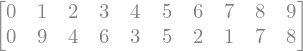

[[0], [9, 8, 7, 1], [4, 3, 6, 2], [5]], 4
+---+---+---+---+---+---+---+---+---+
| 1 |   |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   | 1 |   |
+---+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   | 1 |   |   |
+---+---+---+---+---+---+---+---+---+
|   |   |   |   | 1 |   |   |   |   |
+---+---+---+---+---+---+---+---+---+
|   |   | 1 |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+
|   |   |   |   |   | 1 |   |   |   |
+---+---+---+---+---+---+---+---+---+
|   |   |   | 1 |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   |   | 2 |
+---+---+---+---+---+---+---+---+---+
|   | 1 |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+---+


In [33]:
N = 10
img = list(range(N))
random.shuffle(img)

prm = pm.Permutation(img)
display(sympy.Matrix(prm.two_line()))  # , prm.image, prm.size)
cd = pm.cycle_decomp(prm)
print("{}, {}".format(cd, len(cd)))
G = Grid(prm)

G.show()

In [34]:
grid = G.copy()
nums = []

while grid.size > 1:
    new = grid.transform()
    if type(new) == dict:
        nums += [new["num"]]
        grid = new["grid"]
    else:
        grid = new
    grid.show()
    print("\n↓ {}\n".format(nums)) if grid.size > 1 else "END"
else:
    nums += [grid.matrix[0][0]]
    print("list:{}, total:{}".format(nums, sum(nums)))

+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   | 1 |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   | 1 |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   | 1 |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   | 1 |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   | 1 |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   | 1 |   |   |   |   |   |
+---+---+---+---+---+---+---+---+
|   |   |   |   |   |   |   | 2 |
+---+---+---+---+---+---+---+---+
| 1 |   |   |   |   |   |   |   |
+---+---+---+---+---+---+---+---+

↓ [1]

+---+---+---+---+---+---+---+
|   |   |   |   | 1 |   |   |
+---+---+---+---+---+---+---+
|   |   | 1 |   |   |   |   |
+---+---+---+---+---+---+---+
| 1 |   |   |   |   |   |   |
+---+---+---+---+---+---+---+
|   |   |   | 1 |   |   |   |
+---+---+---+---+---+---+---+
|   | 1 |   |   |   |   |   |
+---+---+---+---+---+---+---+
|   |   |   |   |   |   | 2 |
+---+---+---+---+---+---+---+
|   |   |   |   |   | 1 